In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('C:/Users/sanap/Downloads/sunset_luxury_home.jpg', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(727.5), np.float64(407.5), np.float64(-0.5))

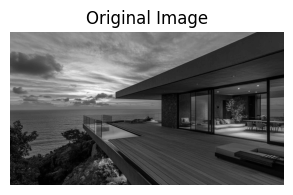

In [3]:
# 2. Plot histogram
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

Text(0.5, 1.0, 'Histogram (Original)')

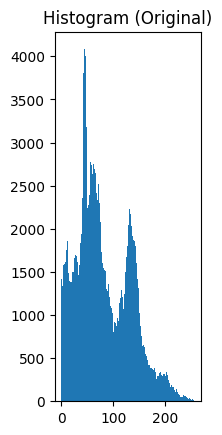

In [4]:
plt.subplot(1,3,2)
plt.hist(img.ravel(), 256, [0,256])
plt.title('Histogram (Original)')

In [5]:
# 3. Histogram Equalization
equ = cv2.equalizeHist(img)

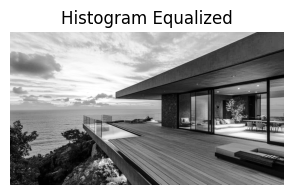

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,3)
plt.imshow(equ, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')
plt.show()

In [10]:
# SPATIAL DOMAIN FILTERS
# Smoothing (Average filter)
kernel = np.ones((5,5), np.float32)/25
smoothed = cv2.filter2D(img, -1, kernel)

In [11]:
# Sharpening filter
sharpen_kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

(np.float64(-0.5), np.float64(727.5), np.float64(407.5), np.float64(-0.5))

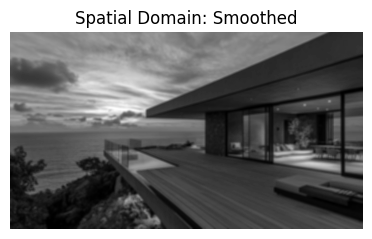

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(smoothed, cmap='gray')
plt.title('Spatial Domain: Smoothed')
plt.axis('off')

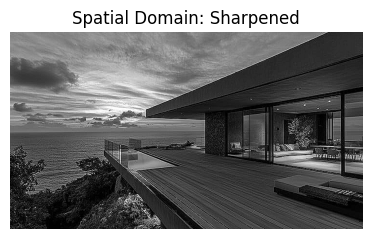

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title('Spatial Domain: Sharpened')
plt.axis('off')
plt.show()

In [14]:
# FREQUENCY DOMAIN FILTERS
# Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

In [15]:
# Low-pass filter
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows, cols), np.uint8)
radius = 30
cv2.circle(mask, (ccol, crow), radius, 1, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
fshift_low = fshift * mask
img_low = np.fft.ifft2(np.fft.ifftshift(fshift_low))
img_low = np.abs(img_low)

In [17]:
# High-pass filter
mask_high = 1 - mask
fshift_high = fshift * mask_high
img_high = np.fft.ifft2(np.fft.ifftshift(fshift_high))
img_high = np.abs(img_high)

(np.float64(-0.5), np.float64(727.5), np.float64(407.5), np.float64(-0.5))

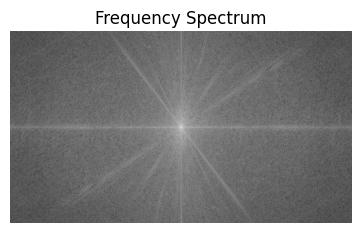

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum')
plt.axis('off')

(np.float64(-0.5), np.float64(727.5), np.float64(407.5), np.float64(-0.5))

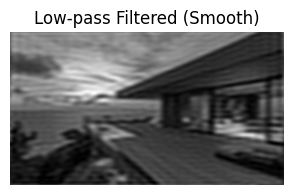

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,2)
plt.imshow(img_low, cmap='gray')
plt.title('Low-pass Filtered (Smooth)')
plt.axis('off')

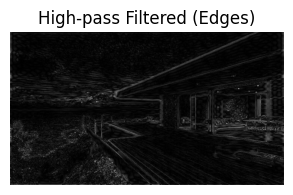

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,3)
plt.imshow(img_high, cmap='gray')
plt.title('High-pass Filtered (Edges)')
plt.axis('off')
plt.show()